## AWnet test

In [1]:
from awnet import pwc_5x5_sigmoid_bilinear   # cm:import AWnet model
import torch

AWnet = pwc_5x5_sigmoid_bilinear.pwc_residual().cuda()
AWnet.load_state_dict(torch.load('awnet/fs0_61_294481_0.00919393_dict.pkl'))
AWnet = AWnet.eval()

def fuseTwoImages(I, J_hat):
    with torch.no_grad():
        fusedTensor,warp,mask = AWnet(J_hat,I)
    return fusedTensor, warp, mask

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp

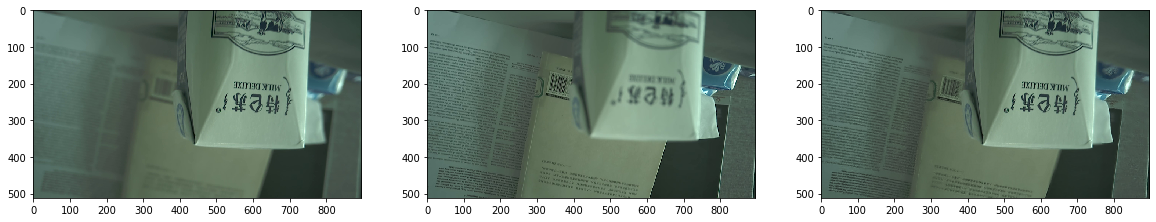

In [5]:
a = cv2.imread("awnet-test-imgs/00368.png")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
b = cv2.imread("awnet-test-imgs/00385.png")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
# a = cv2.resize(a,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_CUBIC)
# b = cv2.resize(b,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_CUBIC)
# a = cv2.copyMakeBorder(a, 16, 16, 21, 21, cv2.BORDER_CONSTANT, value = 0)
# b = cv2.copyMakeBorder(b, 16, 16, 21, 21, cv2.BORDER_CONSTANT, value = 0)
a = torch.Tensor(a[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
b = torch.Tensor(b[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
c, warp, mask = fuseTwoImages(a, b)
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow((a[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[1].imshow((b[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[2].imshow(c[0].cpu().detach().numpy().transpose(1, 2, 0))
plt.show()

/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp

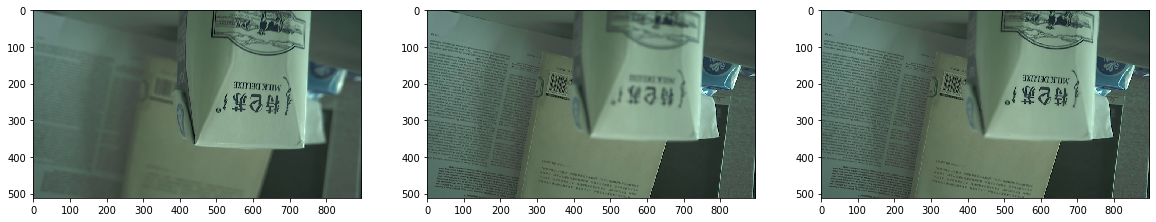

In [6]:
c, warp, mask = fuseTwoImages(b, a)
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow((a[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[1].imshow((b[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[2].imshow(c[0].cpu().detach().numpy().transpose(1, 2, 0))
plt.show()

/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp

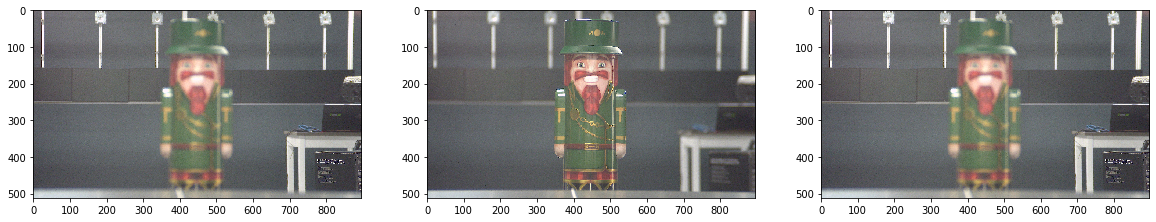

In [7]:
a = cv2.imread("awnet-test-imgs/d1_aligned.png")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
b = cv2.imread("awnet-test-imgs/d2_aligned.png")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
a = cv2.resize(a,(896, 512))
b = cv2.resize(b,(896, 512))
a = torch.Tensor(a[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
b = torch.Tensor(b[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
c, warp, mask = fuseTwoImages(a, b)
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow((a[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[1].imshow((b[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[2].imshow(c[0].cpu().detach().numpy().transpose(1, 2, 0))
plt.show()

/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp

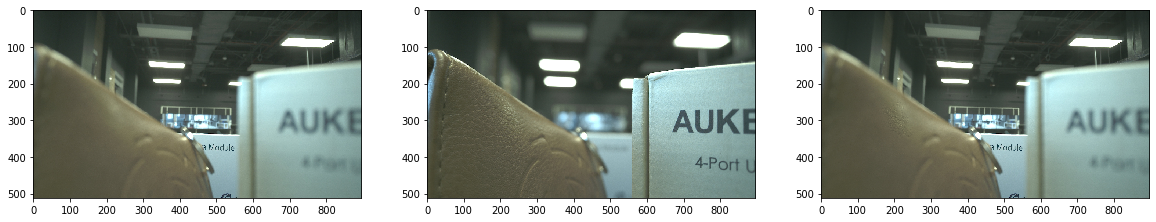

In [8]:
a = cv2.imread("awnet-test-imgs/500_aligned.png")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
b = cv2.imread("awnet-test-imgs/900_aligned.png")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
a = cv2.resize(a,(896, 512))
b = cv2.resize(b,(896, 512))
a = torch.Tensor(a[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
b = torch.Tensor(b[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
c, warp, mask = fuseTwoImages(a, b)
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow((a[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[1].imshow((b[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[2].imshow(c[0].cpu().detach().numpy().transpose(1, 2, 0))
plt.show()

/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp

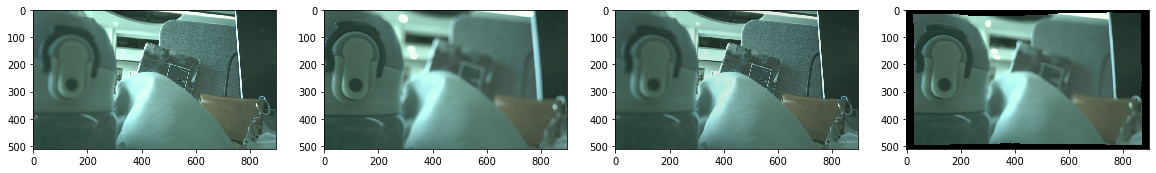

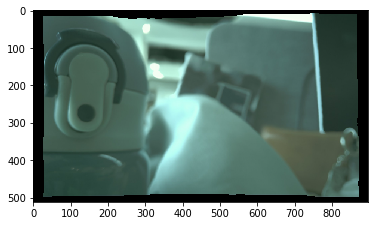

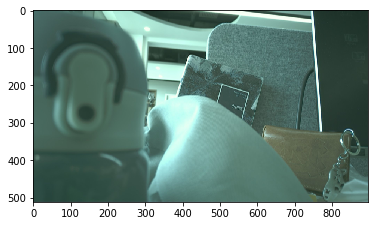

In [16]:
a = cv2.imread("awnet-test-imgs/501.jpg")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
b = cv2.imread("awnet-test-imgs/1000.jpg")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
a = cv2.resize(a,(896, 512))
b = cv2.resize(b,(896, 512))
a = torch.Tensor(a[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
b = torch.Tensor(b[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
c, warp, mask = fuseTwoImages(a, b)
fig, ax = plt.subplots(1, 4, figsize=(20, 16))
ax[0].imshow((a[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[1].imshow((b[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[2].imshow((c[0]/c.max()).cpu().detach().numpy().transpose(1, 2, 0))
ax[3].imshow((warp[0]).cpu().detach().numpy().transpose(1, 2, 0))
plt.show()
# plt.imshow((warp[0]).cpu().detach().numpy().transpose(1, 2, 0))
# plt.show()
# plt.imshow((a[0]).cpu().detach().numpy().transpose(1, 2, 0))
# plt.show()

/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp

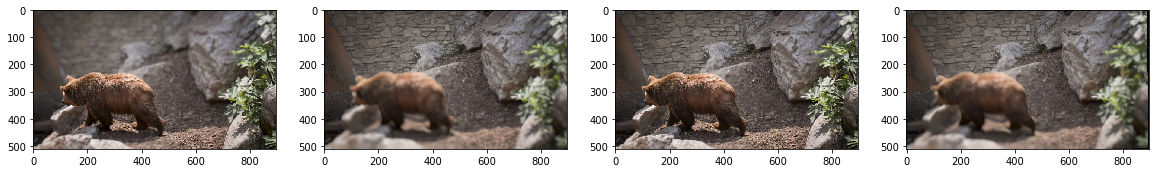

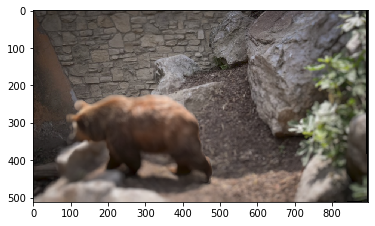

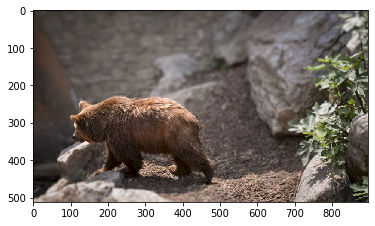

In [18]:
a = cv2.imread("awnet-test-imgs/lr_00005.png")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
b = cv2.imread("awnet-test-imgs/lr_00017.png")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
a = cv2.resize(a,(896, 512))
b = cv2.resize(b,(896, 512))
a = torch.Tensor(a[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
b = torch.Tensor(b[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
c, warp, mask = fuseTwoImages(a, b)
fig, ax = plt.subplots(1, 4, figsize=(20, 16))
ax[0].imshow((a[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[1].imshow((b[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[2].imshow((c[0]/c.max()).cpu().detach().numpy().transpose(1, 2, 0))
ax[3].imshow((warp[0]).cpu().detach().numpy().transpose(1, 2, 0))
plt.show()
plt.imshow((warp[0]).cpu().detach().numpy().transpose(1, 2, 0))
plt.show()
plt.imshow((a[0]).cpu().detach().numpy().transpose(1, 2, 0))
plt.show()

/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp/pip-req-build-0vti0ns4/torch/csrc/autograd/python_function.cpp:638: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
/tmp

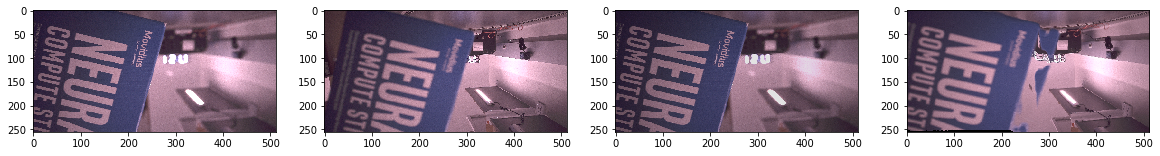

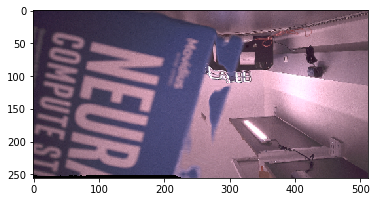

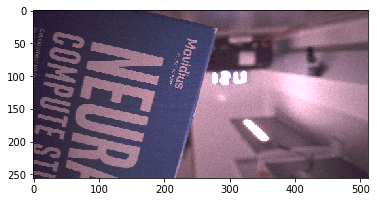

In [4]:
a = cv2.imread("awnet-test-imgs/12150_04.png")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
b = cv2.imread("awnet-test-imgs/12150_05.png")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
a = cv2.resize(a,(512, 256))
b = cv2.resize(b,(512, 256))
a = torch.Tensor(a[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
b = torch.Tensor(b[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
c, warp, mask = fuseTwoImages(a, b)
fig, ax = plt.subplots(1, 4, figsize=(20, 16))
ax[0].imshow((a[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[1].imshow((b[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[2].imshow((c[0]/c.max()).cpu().detach().numpy().transpose(1, 2, 0))
ax[3].imshow((warp[0]).cpu().detach().numpy().transpose(1, 2, 0))
plt.show()
plt.imshow((warp[0]).cpu().detach().numpy().transpose(1, 2, 0))
plt.show()
plt.imshow((a[0]).cpu().detach().numpy().transpose(1, 2, 0))
plt.show()